In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [165]:
df=pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [166]:
df.shape

(891, 12)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above it can be seen that there are 12 columns in the dataset out of which 'Survived' is the target column.
'PassegerId','Name' and 'Ticket' might not have an effect on 'Survived'.
It can be seen that there are null values in the dataset.

In [168]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in 'Age',687 in 'Cabin' and 2 in 'Embarked'.There are high no of null values in 'Cabin'.It cannot be removed
as the place of stay in the ship might have effect on the passenger's survival.



# Handling Missing values in 'Age' column

'Name' column has title, which can give clue of age for e.g 'Master' refers to boy kid. So extract the titles from the 'Name column '
into a new column 'Title'

In [169]:
df['Title']=[df['Name'][i].split(',')[1].split('.')[0].strip(' ') for i in range(0,len(df))]

In [170]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
the Countess      1
Lady              1
Capt              1
Jonkheer          1
Mme               1
Ms                1
Don               1
Name: Title, dtype: int64

Instead of considering all the titles, generalise them into few. Update the same into the column 'Title'

In [171]:
titles_gen={'Mr':'Mr','Miss':'Miss','Mrs':'Mrs','Master':'Master','Dr':'Crew','Rev':'Crew','Major':'Crew','Col':'Crew','Mlle':'Miss',
           'Sir':'Royal','the Countess':'Royal','Lady':'Royal','Capt':'Crew','Jonkheer':'Royal','Mme':'Mrs','Ms':'Ms','Don':'Royal'}

In [172]:
df['Title']=df['Title'].map(titles_gen)

In [173]:
len(df['Title'])

891

In [174]:
df['Title'].value_counts()

Mr        517
Miss      184
Mrs       126
Master     40
Crew       18
Royal       5
Ms          1
Name: Title, dtype: int64

Group the dataset by 'Sex','Pclass' and 'Title' and impute the missing values with median

In [175]:
df['Age'] = df.groupby(['Sex','Pclass','Title'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

In [176]:
df.Age.isnull().sum()

0

# Handling Missing values in 'Embarked' and 'Cabin' columns

There are only 2 missing values in 'Embarked'.Either we can drop those rows or fill with the most frequent value.

In [177]:
df.Embarked=df.Embarked.fillna(df.Embarked.value_counts().index[0])

In [178]:
df['Embarked'].isnull().sum()

0

In [179]:
df['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
C22 C26            3
F2                 3
E101               3
F33                3
E24                2
E8                 2
B58 B60            2
C93                2
B49                2
C124               2
B5                 2
E44                2
C123               2
E33                2
C92                2
B22                2
B18                2
C78                2
E25                2
B28                2
B20                2
B35                2
D17                2
F4                 2
B57 B59 B63 B66    2
C83                2
                  ..
B19                1
E10                1
D6                 1
B42                1
B78                1
D11                1
A7                 1
E63                1
C101               1
C47                1
F G63              1
C86                1
B101               1
B71                1
C103               1
C49                1
C32          

As can be seen the 'Cabin' column has varied data, so just replace the missing values with 'O' indicating 'other'

In [180]:
df['Cabin']=df['Cabin'].fillna('O')

In [181]:
df['Cabin'].isnull().sum()

0

In [182]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Now the dataset has no missing values

In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.138238,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.495175,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mean survival rate is seen to be 38%. Average age of passengers is 29.

# Data Visualisation

In [187]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

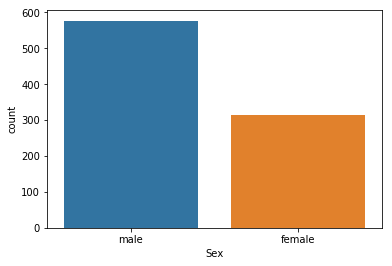

In [186]:
sns.countplot(df['Sex'])

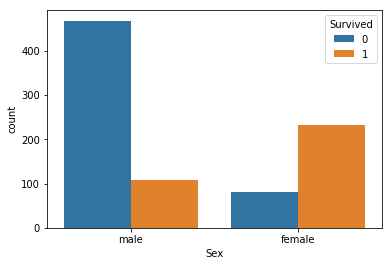

In [185]:
sns.countplot(df['Sex'],hue=df['Survived'])

In the above graph, blue indicates not survived.Inspite of the male population being more,it can be seen that more females survived than males.

In [189]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

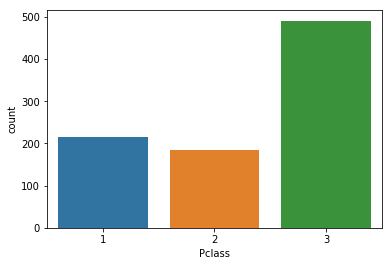

In [190]:
sns.countplot(df['Pclass'])

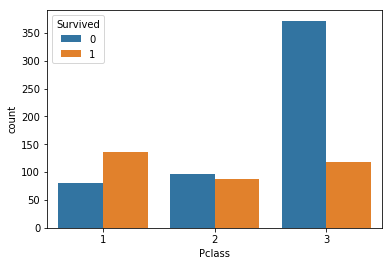

In [188]:
sns.countplot(df['Pclass'],hue=df['Survived'])

From the above it can be seen that the no of passengers is more in class 3 almost more than 2times that of class 1 or class 2.
But the no of people who survived is more in class 1.So gender and class have huge impact on survival.

# Further EDA

'PassengerId','Name' and 'Ticket' may not impact 'Survived'. These columns can be removed.

In [191]:
df=df.drop(columns=['PassengerId','Name','Ticket' ])

In [192]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,O,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,O,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,O,S,Mr


'Cabin' column has varied categories,there is no use with the numbers in the data.Maybe the alphabet indicates the position of the cabin in the ship
So extract the first letter from the column.

In [193]:
df['Cabin']=[df['Cabin'][i][0] for i in range(0,len(df))]

In [194]:
df['Cabin'].head(10)

0    O
1    C
2    O
3    C
4    O
5    O
6    E
7    O
8    O
9    O
Name: Cabin, dtype: object

'SibSp' indicates siblings and spouse count whereas 'Parch' indicates parent child count.These can be clubbed into one feature.


In [195]:
df['Family_count']=df['SibSp']+df['Parch']+1

In [196]:
df['Family_count'].head(20)

0     2
1     2
2     1
3     2
4     1
5     1
6     1
7     5
8     3
9     2
10    3
11    1
12    1
13    7
14    1
15    1
16    6
17    1
18    2
19    1
Name: Family_count, dtype: int64

Remove the 'SibSp' and 'Parch' columns

In [197]:
df=df.drop(columns=['SibSp','Parch'])

In [198]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_count
0,0,3,male,22.0,7.2500,O,S,Mr,2
1,1,1,female,38.0,71.2833,C,C,Mrs,2
2,1,3,female,26.0,7.9250,O,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,2
4,0,3,male,35.0,8.0500,O,S,Mr,1


'Sex','Cabin','Embarked','Title' are categorical variables which have to be converted to numericals as model will nit accept categorical data.
Label Encoder can be used to do this.


In [199]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Sex','Cabin','Embarked','Title']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [200]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_count
0,0,3,1,22.0,7.2500,7,2,3,2
1,1,1,0,38.0,71.2833,2,0,4,2
2,1,3,0,26.0,7.9250,7,2,2,1
3,1,1,0,35.0,53.1000,2,2,4,2
4,0,3,1,35.0,8.0500,7,2,3,1
5,0,3,1,26.0,8.4583,7,1,3,1
6,0,1,1,54.0,51.8625,4,2,3,1
7,0,3,1,2.0,21.0750,7,2,1,5
8,1,3,0,27.0,11.1333,7,2,4,3
9,1,2,0,14.0,30.0708,7,0,4,2


In [201]:
df.dtypes

Survived          int64
Pclass            int64
Sex               int32
Age             float64
Fare            float64
Cabin             int32
Embarked          int32
Title             int32
Family_count      int64
dtype: object

Now the dataset is ready for modelling

Split the data into dependent(y) and independent variables(x)

In [202]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [203]:
x.shape

(891, 8)

In [204]:
y.shape

(891,)

# Models

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=47)

# Logistic Regression

In [208]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [209]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [210]:
print('accuracy score:',accuracy_score(y_test,pred))

accuracy score: 0.7898305084745763


Hyperparameter Tuning

In [214]:
parameters={'penalty':['l1', 'l2', 'elasticnet']}
lg=LogisticRegression()
lg1=GridSearchCV(lg,parameters,cv=5)
lg1.fit(x,y)
lg1

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']})

In [215]:
print(lg1.best_params_)

{'penalty': 'l2'}


In [216]:
lg=LogisticRegression(penalty='l2')
lg.fit(x_train,y_train)

LogisticRegression()

In [217]:
pred=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred))

accuracy score: 0.7898305084745763
